In [18]:
import numpy as np
from vtk import vtkStructuredPointsReader
from vtkmodules.util import numpy_support as VN
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import vtk
from vtkmodules.util.numpy_support import vtk_to_numpy
from matplotlib.colors import ListedColormap

In [19]:
#Index 508 for the longest spicule in 200G
#Index 321 for the longest spicule in 300G

In [20]:
reader = vtkStructuredPointsReader()
reader.SetFileName("200G_lndem_3D.vtk")
reader.ReadAllVectorsOn()
reader.ReadAllScalarsOn()
reader.Update()

data = reader.GetOutput()
dim = data.GetDimensions()
Ox,Oy,Oz=data.GetOrigin()
Sx,Sy,Sz=data.GetSpacing()

u = VN.vtk_to_numpy(data.GetPointData().GetArray('lndem_3d'))
b = VN.vtk_to_numpy(data.GetPointData().GetArray('log10T'))

u = u.reshape(dim,order='F')
b = b.reshape(dim,order='F')

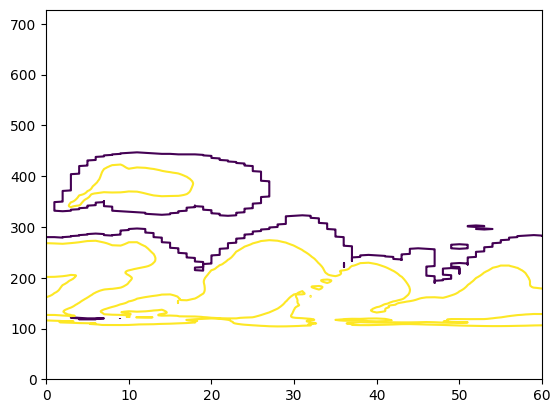

In [21]:
#grange function replaced with arange in python while bytscl is replaced 
#with np.clip and astype, np.floor is used for refoming and levels is used to clor scheming

# Assuming lndem_3D is a numpy array containing the data
lndem_3D=u
nx, nz, nt = lndem_3D.shape
id=238


# Reform and bytscl the data  
data = np.clip(np.floor(255 * (lndem_3D[id, 0:nz-1, 0:nt-1] + 3) / 3), 0, 255).astype(np.uint8)
# Set up x and time arrays
z = np.arange(nz-1)
time = np.arange(nt-1)
[X,Y]=np.meshgrid(time,z)


# Set up contour levels
levels = np.arange(0, 255, 200)

# Plot the contour
cont = plt.contour(X,Y, data, levels=levels)

# Show the plot
plt.show()

After specifying the color scheme


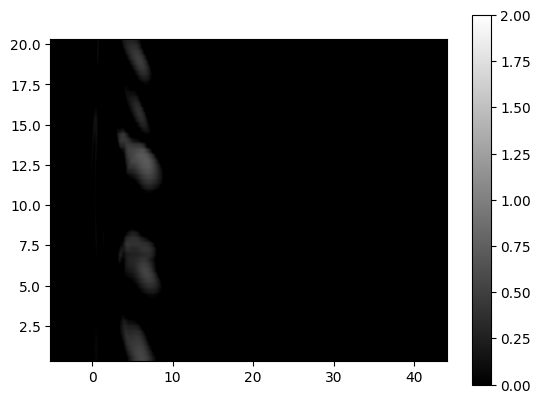

In [28]:
# Load the VTK file
reader = vtk.vtkStructuredPointsReader()
reader.SetFileName("200G_lndem_3D.vtk")
reader.Update()

# Get the data from the VTK file
data = reader.GetOutput()
dims = data.GetDimensions()
Origin=data.GetOrigin()
Spacing=data.GetSpacing()
vtk_array = data.GetPointData().GetScalars()
np_array = vtk_to_numpy(vtk_array)
np_array = np_array.reshape(dims[2], dims[1], dims[0])


id=720
slice_data=np_array[:, :, id]


# Define the custom grayscale color scheme
colors_list = [(i/255.0, i/255.0, i/255.0) for i in range(256)]
values_list = [i for i in range(256)]
colors = ListedColormap(colors_list)

# Plot the slice data with the customized color scheme
print("After specifying the color scheme")
plt.imshow(slice_data, cmap=colors, vmin=0, vmax=2, extent=[Origin[1], Origin[1] + Spacing[1]*(dims[1]-1), Origin[2], Origin[2] + Spacing[2]*(dims[2]-1)], aspect=2) #extent is for resizing the axes and aspect is the ratio
plt.colorbar()
plt.show()